In [1]:
from unittest.mock import AsyncMock
from eva.configuration.constants import EVA_ROOT_DIR
from eva.interfaces.relational.db import EVACursor
connection = AsyncMock()
cursor = EVACursor(connection)

In [4]:
# !wget -nc "https://www.dropbox.com/s/cnsgyitrtw40lgs/model.pth"

In [2]:
table_check = cursor.query("DROP TABLE IF EXISTS SALIENCY;")
table_check.execute()
load_pdf1 = cursor.load(file_regex=f'{EVA_ROOT_DIR}/data/saliency/test1.jpeg', format="IMAGE", table_name="SALIENCY")
load_pdf1.execute()
load_pdf2 = cursor.load(file_regex=f'{EVA_ROOT_DIR}/data/saliency/test2.jpeg', format="IMAGE", table_name="SALIENCY")
load_pdf2.execute()

In [3]:
udf_check = cursor.query("DROP UDF IF  EXISTS SimilarityFeatureExtractor")
udf_check.execute()
udf = cursor.query(
    f"""CREATE UDF IF NOT EXISTS SaliencyFeatureExtractor
                    IMPL  '{EVA_ROOT_DIR}/eva/udfs/saliency_feature_extractor.py';
        """
)
udf.execute()

06-02-2023 20:07:40 WARNING[drop_udf_executor:drop_udf_executor.py:exec:0040] UDF SimilarityFeatureExtractor does not exist, therefore cannot be dropped.


In [4]:
table = cursor.table("SALIENCY")
table_udf = table.cross_apply(
            "SaliencyFeatureExtractor(data)", "objs(saliency)"
        )
table_udf.df()

/Users/vivekmandal/Desktop/Vivek/Final Eva/eva/test_eva_db/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/vivekmandal/Desktop/Vivek/Final Eva/eva/test_eva_db/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


,saliency._row_id,saliency.name,saliency.data,objs.saliency
0,1,/Users/vivekmandal/Desktop/Vivek/Final Eva/eva...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[[tensor(0.0202), tensor(0.0252), tensor(0.01..."
1,2,/Users/vivekmandal/Desktop/Vivek/Final Eva/eva...,"[[[30, 31, 13], [33, 34, 16], [33, 34, 20], [4...","[[[tensor(0.0033), tensor(0.0050), tensor(0.00..."


/Users/vivekmandal/Desktop/Vivek/Final Eva/eva/test_eva_db/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/vivekmandal/Desktop/Vivek/Final Eva/eva/test_eva_db/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


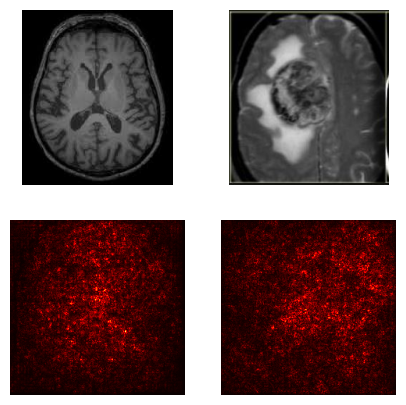

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import torch 
df = table_udf.df()
fig, ax = plt.subplots(nrows=2, ncols=len(df), figsize=[15,18])

for i in range(len(df)):
  img = df['saliency.data'].iloc[i]
  ax[0,i].imshow(img)
  ax[1,i].imshow(df["objs.saliency"][i][0],cmap=plt.cm.hot)
  ax[0,i].axis('off')
  ax[1,i].axis('off')
plt.gcf().set_size_inches(5, 5)
plt.show()
     